Metadata Columns: Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')
Review Columns: Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')
Merged Shape: (10000, 13)


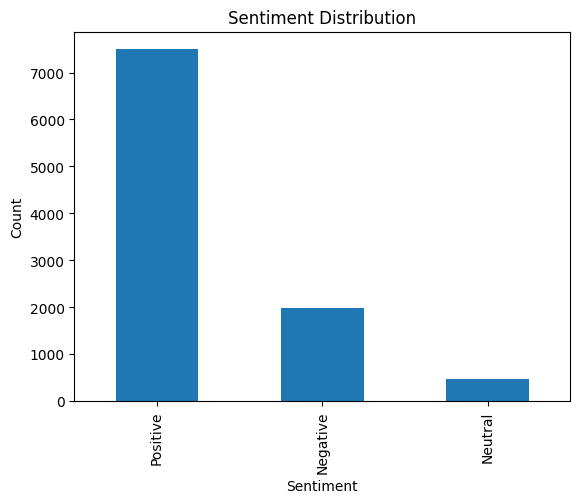

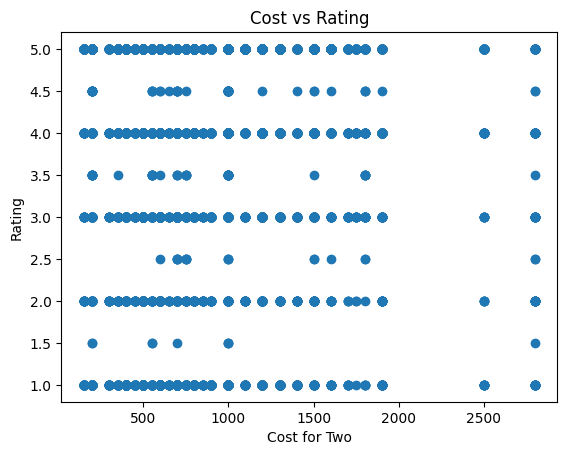

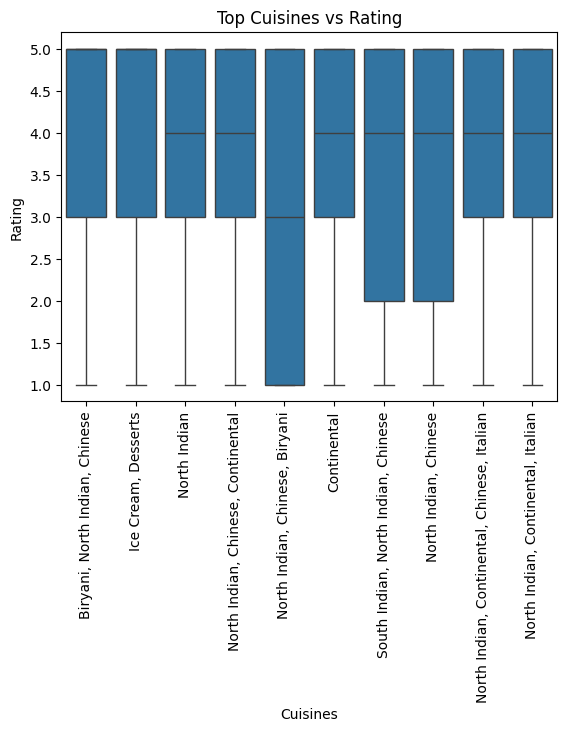

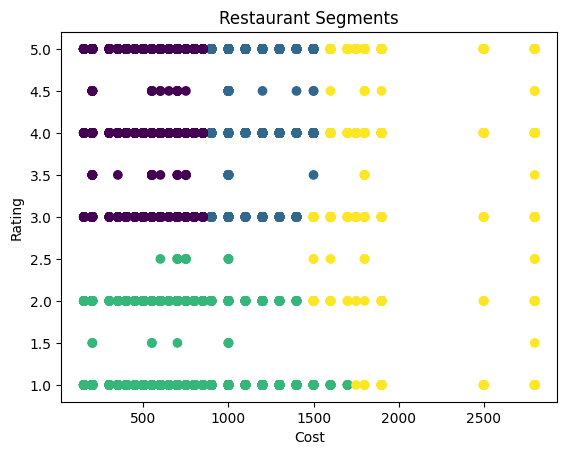

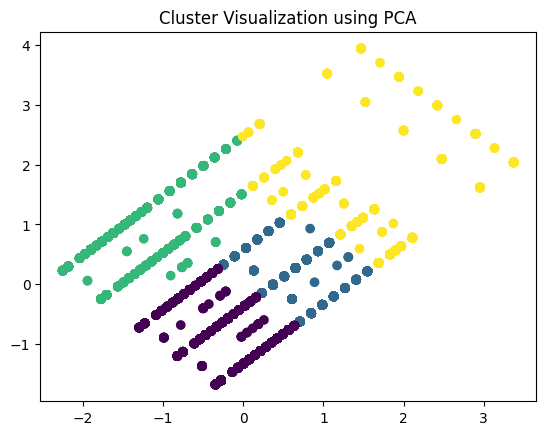

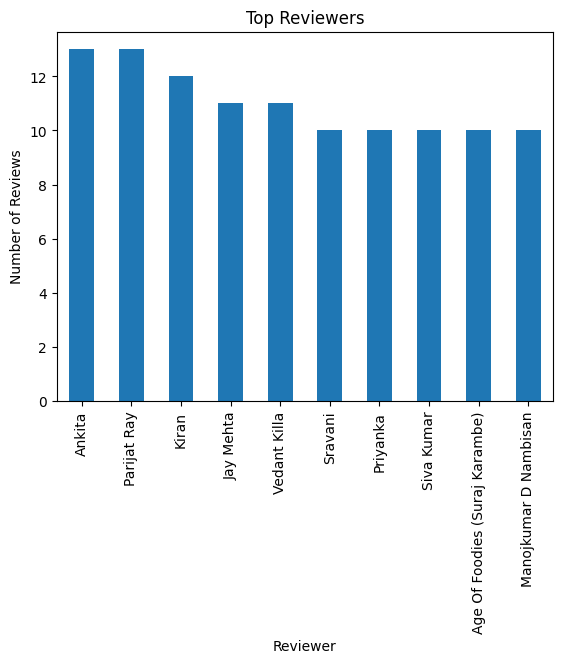

PROJECT COMPLETED SUCCESSFULLY 🚀


In [2]:
# ==============================
# 1️⃣ IMPORT LIBRARIES
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from textblob import TextBlob

# ==============================
# 2️⃣ LOAD DATASETS
# ==============================

meta = pd.read_csv("Zomato Restaurant names and Metadata.csv")
reviews = pd.read_csv("Zomato Restaurant reviews.csv")

meta.columns = meta.columns.str.strip()
reviews.columns = reviews.columns.str.strip()

print("Metadata Columns:", meta.columns)
print("Review Columns:", reviews.columns)

# ==============================
# 3️⃣ MERGE DATASETS (CORRECTED)
# ==============================

df = pd.merge(meta, reviews, left_on='Name', right_on='Restaurant')

print("Merged Shape:", df.shape)

# ==============================
# 4️⃣ DATA CLEANING
# ==============================

# Clean Rating
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Clean Cost
df['Cost'] = df['Cost'].astype(str).str.replace(',', '')
df['Cost'] = pd.to_numeric(df['Cost'], errors='coerce')

df = df.dropna(subset=['Rating', 'Cost', 'Review'])

# ==============================
# 5️⃣ SENTIMENT ANALYSIS
# ==============================

def get_sentiment(text):
    polarity = TextBlob(str(text)).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Review'].apply(get_sentiment)

# ==============================
# 6️⃣ SENTIMENT VISUALIZATION
# ==============================

plt.figure()
df['Sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# ==============================
# 7️⃣ COST VS RATING
# ==============================

plt.figure()
plt.scatter(df['Cost'], df['Rating'])
plt.xlabel("Cost for Two")
plt.ylabel("Rating")
plt.title("Cost vs Rating")
plt.show()

# ==============================
# 8️⃣ CUISINE VS RATING
# ==============================

top_cuisines = df['Cuisines'].value_counts().head(10).index
top_df = df[df['Cuisines'].isin(top_cuisines)]

plt.figure()
sns.boxplot(x='Cuisines', y='Rating', data=top_df)
plt.xticks(rotation=90)
plt.title("Top Cuisines vs Rating")
plt.show()

# ==============================
# 9️⃣ K-MEANS CLUSTERING
# ==============================

features = df[['Rating', 'Cost']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# ==============================
# 🔟 CLUSTER VISUALIZATION
# ==============================

plt.figure()
plt.scatter(df['Cost'], df['Rating'], c=df['Cluster'])
plt.xlabel("Cost")
plt.ylabel("Rating")
plt.title("Restaurant Segments")
plt.show()

# ==============================
# 1️⃣1️⃣ PCA VISUALIZATION
# ==============================

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure()
plt.scatter(pca_features[:,0], pca_features[:,1], c=df['Cluster'])
plt.title("Cluster Visualization using PCA")
plt.show()

# ==============================
# 1️⃣2️⃣ TOP REVIEWERS
# ==============================

top_reviewers = df['Reviewer'].value_counts().head(10)

plt.figure()
top_reviewers.plot(kind='bar')
plt.title("Top Reviewers")
plt.ylabel("Number of Reviews")
plt.show()

print("PROJECT COMPLETED SUCCESSFULLY 🚀")
